In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [5]:
data_baseline = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_amplitude_base.nc', decode_times=True)

In [6]:
data_baseline = data_baseline.isel(z=0)

In [7]:
data_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/DIC/DIC_amplitude_oae.nc', decode_times=True)

In [8]:
data_oae = data_oae.isel(z=0)

In [9]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [10]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [11]:
month_length_baseline = dataframe_base.time_counter.dt.days_in_month
dic_base = ((dataframe_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

In [12]:
month_length_oae = dataframe_oae.time_counter.dt.days_in_month
dic_oae = ((dataframe_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

### Averaged Annual Amplitude of DIC for the last ten years without OAE

In [13]:
dic_max_base = dic_base.resample(time_counter='AS').max('time_counter')

In [14]:
dic_min_base = dic_base.resample(time_counter='AS').min('time_counter')

In [15]:
dic_amplitude_base = (dic_max_base['DIC'] - dic_min_base['DIC']).to_dataset(name='DIC')

In [16]:
dic_amplitude_base_map = (dic_amplitude_base.DIC.mean(dim=('time_counter'))).to_dataset(name='DIC')

Text(0.5, 1.06, 'DIC seasonal cycle change without OAE')

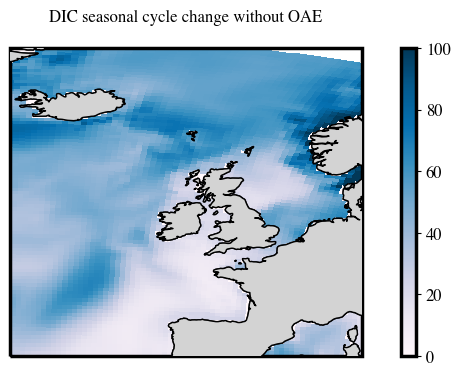

In [17]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=dic_amplitude_base_map.DIC.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 100, cmap="PuBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('DIC seasonal cycle change without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of DIC for the last ten years with OAE

In [18]:
dic_max_oae = dic_oae.resample(time_counter='AS').max('time_counter')

In [19]:
dic_min_oae = dic_oae.resample(time_counter='AS').min('time_counter')

In [20]:
dic_amplitude_oae = (dic_max_oae['DIC'] - dic_min_oae['DIC']).to_dataset(name='DIC')

In [21]:
dic_amplitude_oae_map = (dic_amplitude_oae.DIC.mean(dim=('time_counter'))).to_dataset(name='DIC')

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().



Text(0.5, 1.06, 'DIC seasonal cycle change with OAE')

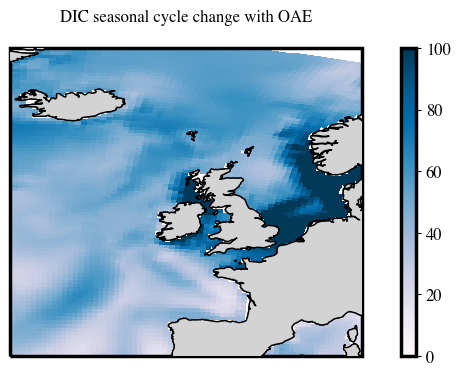

In [22]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

dic_amplitude_oae_map.DIC.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 100, cmap="PuBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('DIC seasonal cycle change with OAE', fontname="Times", fontsize=12, y=1.06)

### Δ DIC between Baseline and OAE scenario

In [23]:
dic_amplitude_change = dic_amplitude_oae - dic_amplitude_base

In [24]:
dic_amplitude_change_map = (dic_amplitude_change.DIC.mean(dim=('time_counter'))).to_dataset(name='DIC')

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().



Text(0.5, 1.06, 'DIC seasonal cycle difference between with and without OAE')

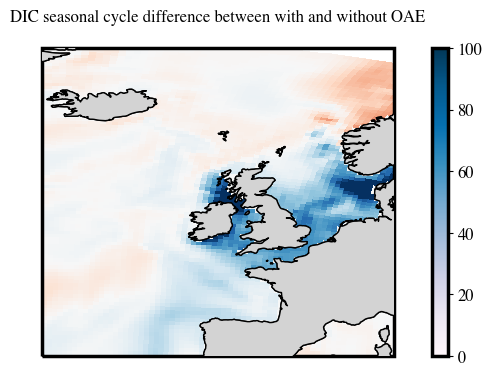

In [25]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

dic_amplitude_change_map.DIC.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = -100, vmax = 100, cmap="RdBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('DIC seasonal cycle difference between with and without OAE', fontname="Times", fontsize=12, y=1.06)

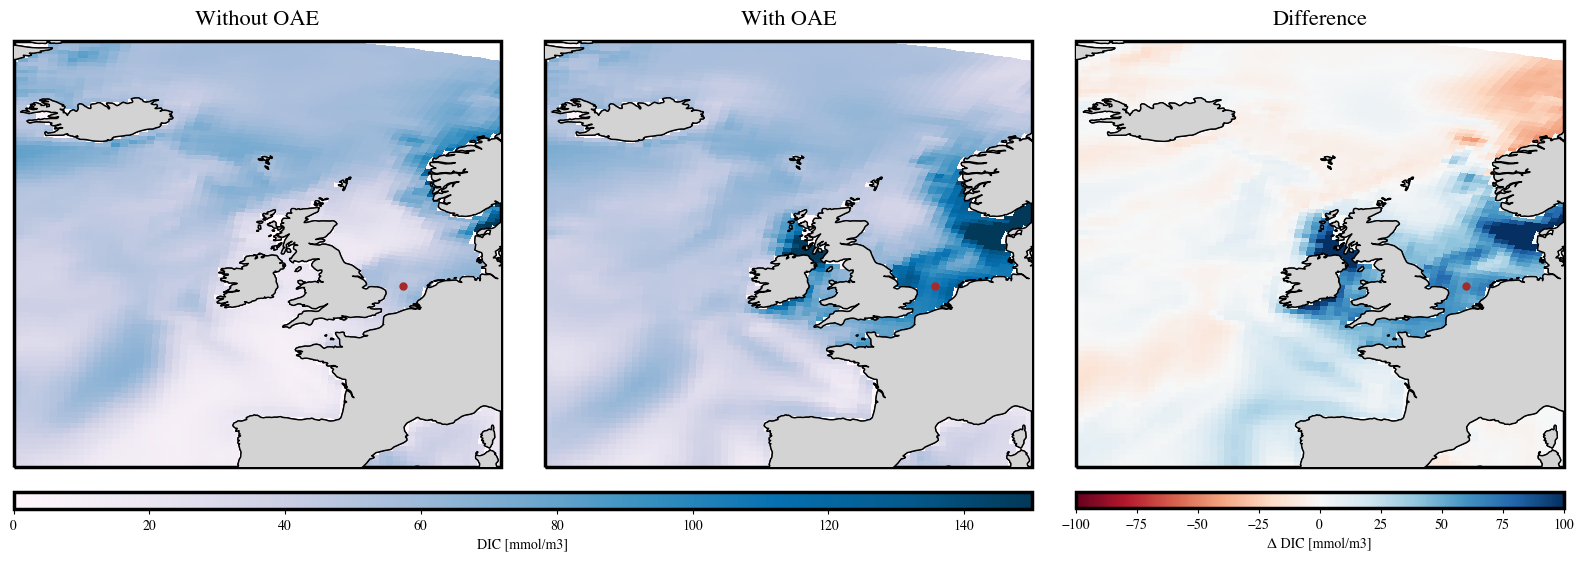

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im1 = dic_amplitude_base_map.DIC.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=150,
        cmap="PuBu",
        add_colorbar=False
    )
    
im2 = dic_amplitude_oae_map.DIC.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=150,
        cmap="PuBu",
        add_colorbar=False
    )
    
im3 = dic_amplitude_change_map.DIC.plot.pcolormesh( 
        ax=ax3, x="nav_lon", y="nav_lat",
        vmin=-100,
        vmax=100,
        cmap="RdBu", 
        add_colorbar=False
    )
    
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.coastlines()
    ax.set_extent([-25, 10, 40, 70])
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')
    ax.plot(3, 53, "o", color='brown', markersize=5)

for ax in axes: 
    if ax == ax1:
        ax.set_title("Without OAE", fontsize=16, y=1.02)
    elif ax == ax2:
        ax.set_title("With OAE", fontsize=16, y=1.02),
    else:
        ax.set_title("Difference", fontsize=16, y=1.02)    

font_size = 10
        
cbar = plt.colorbar(im1, ax = [ax1, ax2], aspect = 60, pad=0.04, location='bottom')
cbar.set_label('DIC [mmol/m3]', fontsize=10)
cbar.ax.tick_params(labelsize=font_size)

cb3= plt.colorbar(im3,ax=ax3, aspect = 30, pad=0.04, location='bottom')
cb3.set_label('Δ DIC [mmol/m3]', fontsize=10)
cb3.ax.yaxis.get_offset_text().set(size=10)
cb3.ax.tick_params(labelsize=font_size)

pass

#fig.suptitle('Seasonal Cycle Amplitude of DIC (average over the last decade)', fontname='Times', fontsize=15, y=0.81)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/DIC/figs/dic_seasonal_cycle.png')

### Amplitude at Location Point

In [25]:
dic_base_sliced = dataframe_base.where((3 < dataframe_base.nav_lon) & (dataframe_base.nav_lon < 3.1) & (52 < dataframe_base.nav_lat) & (dataframe_base.nav_lat < 53), drop=True)
dic_oae_sliced = dataframe_oae.where((3 < dataframe_oae.nav_lon) & (dataframe_oae.nav_lon < 3.1) & (52 < dataframe_oae.nav_lat) & (dataframe_oae.nav_lat < 53), drop=True)

In [26]:
dic_max_base_slc = dic_base_sliced.resample(time_counter='AS').max('time_counter')

In [27]:
dic_min_base_slc = dic_base_sliced.resample(time_counter='AS').min('time_counter')

In [28]:
dic_amplitude_base_slc = (dic_max_base_slc['DIC'] - dic_min_base_slc['DIC']).to_dataset(name='DIC')

In [29]:
dic_max_base_slc = dic_max_base_slc.DIC.mean(dim=('time_counter'))
dic_min_base_slc = dic_min_base_slc.DIC.mean(dim=('time_counter'))
dic_amplitude_base_slc = dic_amplitude_base_slc.DIC.mean(dim=('time_counter'))

In [30]:
dic_max_oae_slc = dic_oae_sliced.resample(time_counter='AS').max('time_counter')

In [31]:
dic_min_oae_slc = dic_oae_sliced.resample(time_counter='AS').min('time_counter')

In [32]:
dic_amplitude_oae_slc = (dic_max_oae_slc['DIC'] - dic_min_oae_slc['DIC']).to_dataset(name='DIC')

In [33]:
dic_max_oae_slc = dic_max_oae_slc.DIC.mean(dim=('time_counter'))
dic_min_oae_slc = dic_min_oae_slc.DIC.mean(dim=('time_counter'))
dic_amplitude_oae_slc = dic_amplitude_oae_slc.DIC.mean(dim=('time_counter'))